<a href="https://colab.research.google.com/github/SriTejaRao92/Customer-Churn-Prediction/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


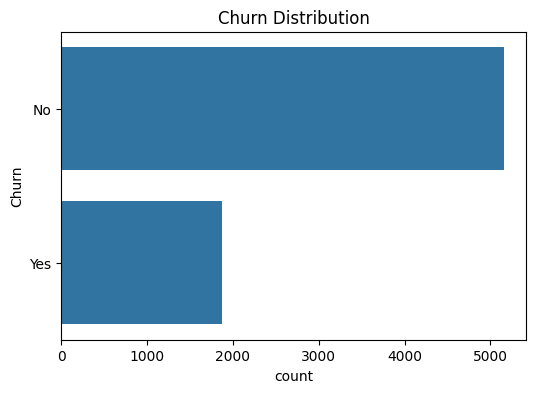

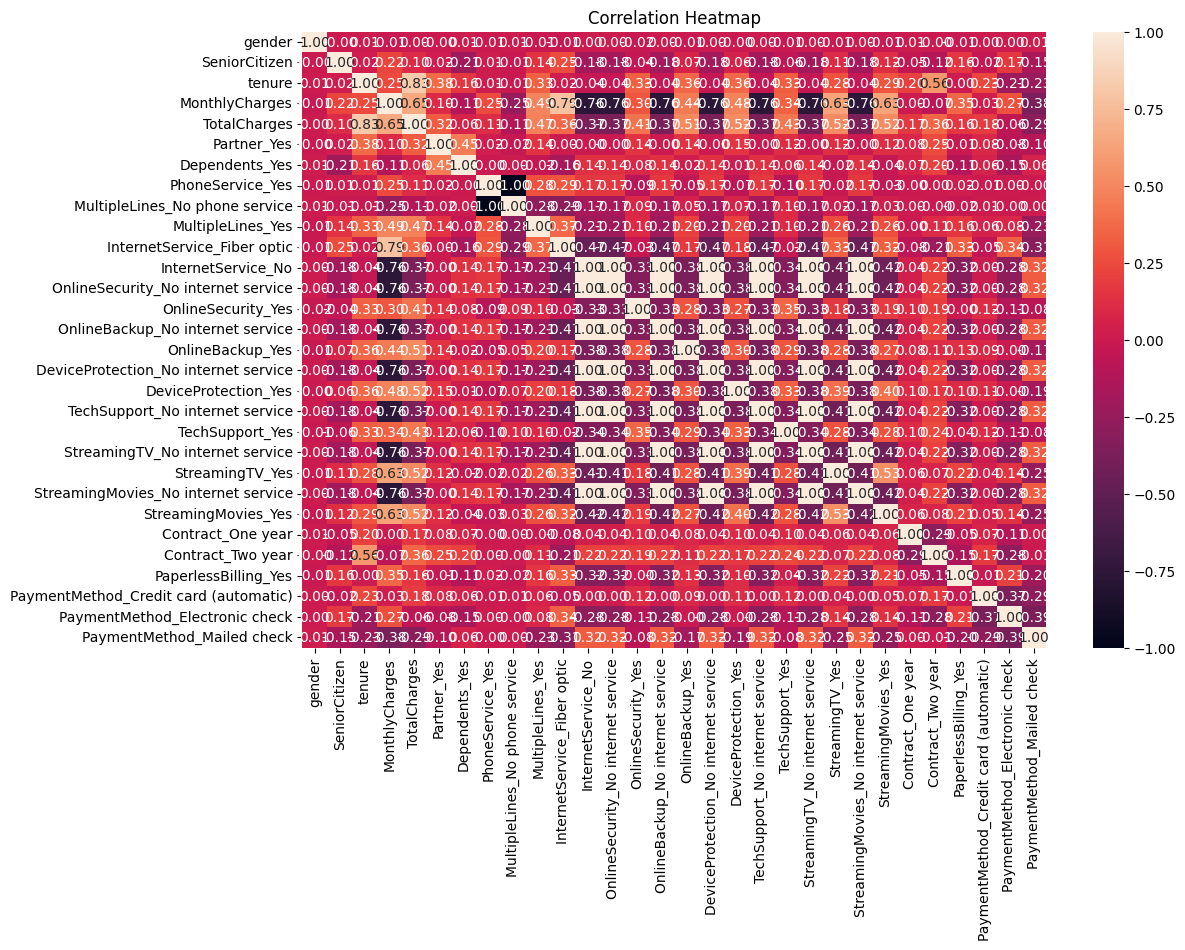

Logistic Regression: (0.795260663507109, 0.6375266524520256, 0.5329768270944741, 0.5805825242718446, 0.7116143012167012)
Random Forest: (0.785781990521327, 0.6252873563218391, 0.48484848484848486, 0.5461847389558233, 0.6898096523661404)
XGBoost: (0.7691943127962085, 0.5734126984126984, 0.5151515151515151, 0.5427230046948357, 0.6881761449224328)


In [14]:

# churn_analysis.ipynb

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os # Import the os module

# Load data
data = pd.read_csv('sample_data/telco_customer_churn.csv')

# Check for missing values
print(data.isnull().sum())
# Create the 'data' directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Data Preprocessing
# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data = pd.get_dummies(data, columns=['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                     'DeviceProtection', 'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract', 'PaperlessBilling',
                                     'PaymentMethod'], drop_first=True)

# Replace empty strings with NaN in numerical columns
data['tenure'] = pd.to_numeric(data['tenure'], errors='coerce')
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with NaN values in numerical columns
data.dropna(subset=['tenure', 'MonthlyCharges', 'TotalCharges'], inplace=True)

# Normalize numerical features
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Save preprocessed data
data.to_csv('data/preprocessed_data.csv', index=False)

# Exploratory Data Analysis (EDA)
# Churn count plot
plt.figure(figsize=(6, 4))
sns.countplot(data['Churn'])
plt.title('Churn Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
# Exclude the 'customerID' and 'Churn' columns from the correlation matrix
corr_data = data.drop(['customerID', 'Churn'], axis=1) # Create a new DataFrame without 'customerID' and 'Churn'
sns.heatmap(corr_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering
# Create tenure category feature
data['tenure_category'] = pd.cut(data['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years', '5-6 Years'])
data = pd.get_dummies(data, columns=['tenure_category'], drop_first=True)

# Save feature engineered data
data.to_csv('data/feature_engineered_data.csv', index=False)

# Modeling
# Prepare data for modeling
X = data.drop(['Churn', 'customerID'], axis=1) # Drop 'customerID' along with 'Churn'
y = data['Churn'].map({'Yes': 1, 'No': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# XGBoost
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Model Evaluation
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

print('Logistic Regression:', evaluate_model(y_test, y_pred_log_reg))
print('Random Forest:', evaluate_model(y_test, y_pred_rf))
print('XGBoost:', evaluate_model(y_test, y_pred_xgb))

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
